In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = np.genfromtxt('/content/drive/MyDrive/data (2)/data/ridgetrain.txt')
test = np.genfromtxt('/content/drive/MyDrive/data (2)/data/ridgetest.txt')

In [5]:
x_train, y_train = train[:, 0], train[:, 1]
x_test, y_test = test[:, 0], test[:, 1]

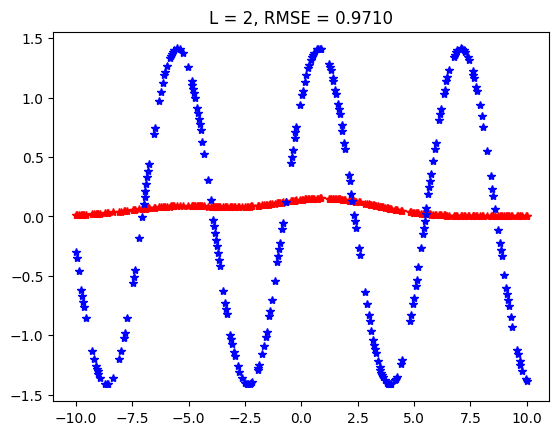

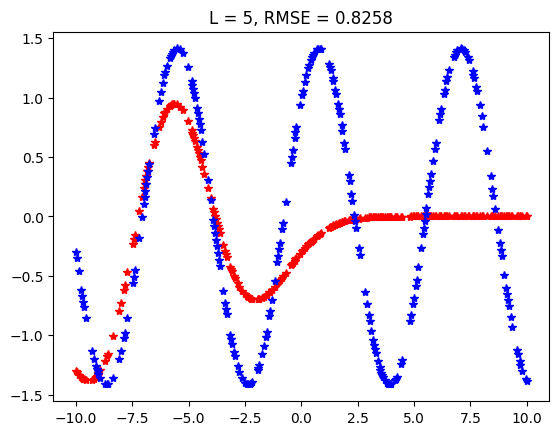

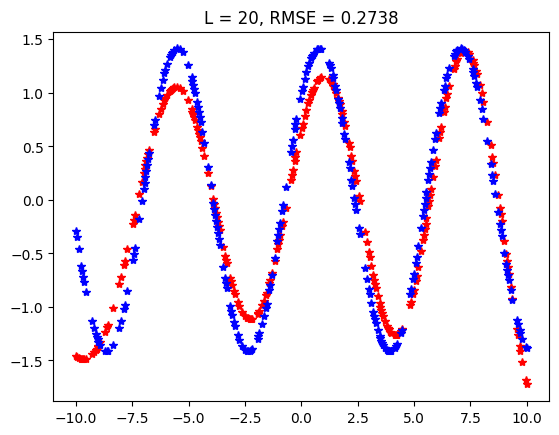

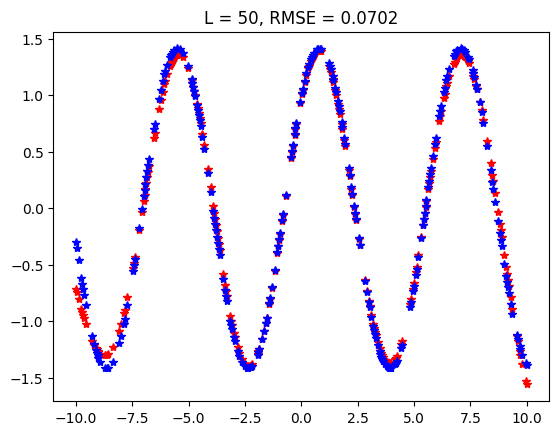

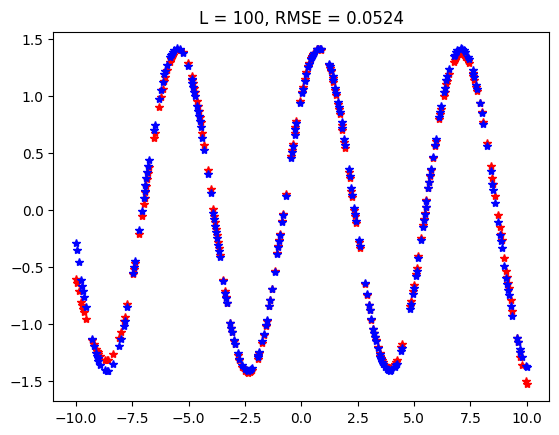

In [9]:
landmark_sizes = [2, 5, 20, 50, 100]

for L in landmark_sizes:
    z = np.random.choice(x_train, L, replace=False)
    Id = np.eye(L)
    xf_train = np.exp(-0.1 * np.square(x_train.reshape((-1, 1)) - z.reshape((1, -1))))
    xf_test = np.exp(-0.1 * np.square(x_test.reshape((-1, 1)) - z.reshape((1, -1))))
    W = np.linalg.solve(np.dot(xf_train.T, xf_train) + 0.1 * Id, np.dot(xf_train.T, y_train.reshape((-1, 1))))
    y_pred = np.dot(xf_test, W)
    rmse = np.sqrt(np.mean((y_test.reshape((-1, 1)) - y_pred) ** 2))


    # Plot results
    plt.figure()
    plt.title(f'L = {L}, RMSE = {rmse:.4f}')
    plt.plot(x_test, y_pred, 'r*')
    plt.plot(x_test, y_test, 'b*')


plt.show()